# Block Truncation Coding(BTC)

In [1]:
import numpy as np
import math
import cv2
from IPython.display import Image
import matplotlib.pyplot as plt
from math import log10, sqrt 

In [2]:
#creating a dummy matrix
omatrix = np.zeros([512,512],dtype = np.uint8) 
#print (omatrix)

In [3]:
#reading and displaying an image

img = cv2.imread('test.jpg',0)
#cv2.imshow('image',img)
cv2.waitKey(0)          
cv2.destroyAllWindows()

#dimension
x,y=img.shape
#print(x,"*",y)


# Input Image

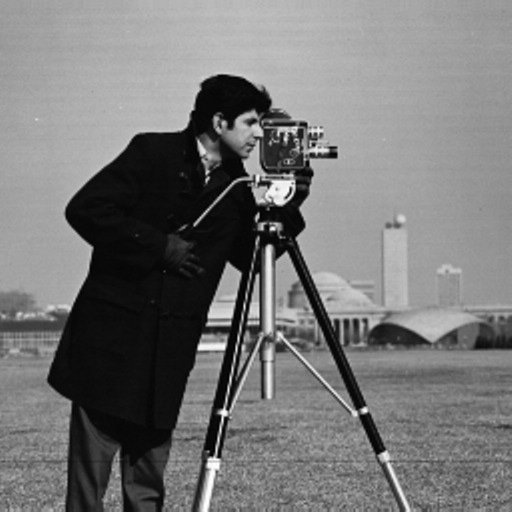

In [4]:
Image(filename="test.jpg")

In [5]:
array_value=cv2.imread('test.jpg',0)
#print(array_value)
#print(array_value.shape)

In [6]:

def blockshaped(arr, nrows, ncols):
    [h, w] = arr.shape
    print(h,w)
    assert h % nrows == 0, "{} rows is not evenly divisble by {}".format(h, nrows)
    assert w % ncols == 0, "{} cols is not evenly divisble by {}".format(w, ncols)
    return (arr.reshape(h//nrows, nrows, -1, ncols)
               .swapaxes(1,2)
               .reshape(-1, nrows, ncols))


In [7]:
s=(blockshaped(array_value, 4,4))


512 512


In [8]:
#print(s)

In [9]:
def decode(a,b,bit_4x4_block):
    temp1=bit_4x4_block
    for i in range(4):
        for j in range(4):
            if temp1[i][j]==1:
                temp1[i][j]=b
            else:
                temp1[i][j]=a
    return(temp1)
width=x
height=y
blocksize=4
horBlkCnt = width // blocksize
verBlkCnt = height // blocksize

def Encode(p):
    #mean
    mean_val=p.mean()
    #print("mean:",mean_val)

    #standard deviation
    std_dev=p.std()
    #print("sd:",std_dev)
    
    
        
    # finding the length
    n=len(p)
    #print("len",n)

    #replacing as 0 & 1
    temp1=p
    for i in range(4):
        for j in range(4):
            if temp1[i][j]>mean_val:
                temp1[i][j]=1
            else:
                temp1[i][j]=0
    #print("encoded matrix:",temp1)

    #count
    c1=0
    c2=0
    for i in range(4):
           for j in range(4):
                if temp1[i][j]==0:
                    c1=c1+1
                else:
                    c2=c2+1
    #print("above mean n+:",c1)
    #print("below mean n-:",c2)

    #finding x-
    if(c1==0):
        a=mean_val
    else:
        a=mean_val-std_dev*math.sqrt(c2/c1)
        #print("x-:",a)

    #finding x+
    if(c2==0):
        b=mean_val
    else:
        b=mean_val+std_dev*math.sqrt(c1/c2)
        #print("x+:",b)

    return [a , b, temp1]
    
#print(s)
#print("***************************************************")
for i in range(verBlkCnt):
    for j in range(horBlkCnt):
        #print(i * horBlkCnt + j)
        #print(s[i * horBlkCnt + j])
        [a , b, bit_4x4_block] = Encode(s[i * horBlkCnt + j])
        o=decode(a,b,bit_4x4_block)
        #print("decoded matrix:",o)    
        for b in range(4):
            for v in range(4):
                omatrix[i*blocksize+b,j*blocksize+v]=o[b,v]
  
    

In [10]:
#store in output matrix
#print(omatrix)
#omatrix.shape
#print(omatrix[1])

In [11]:
cv2.imwrite('d.jpg',omatrix)

True

# Output Image

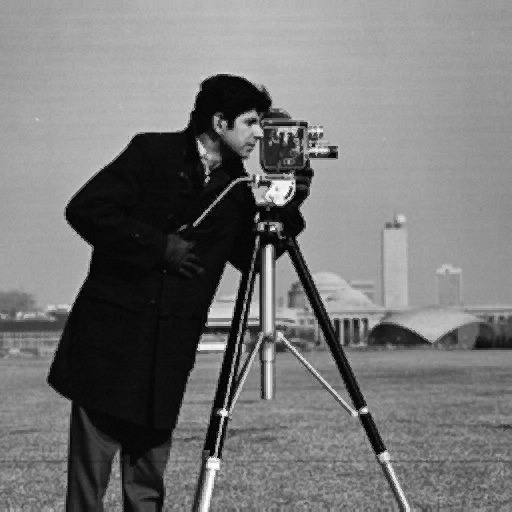

In [12]:
#output image

Image(filename="d.jpg")

# PSNR Calulation

In [13]:
#psnr calculation
  
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
def main(): 
     original = cv2.imread("test.jpg") 
     compressed = cv2.imread("d.jpg", 1) 
     value = PSNR(original, compressed) 
     print(f"PSNR value is {value} dB") 
       
if __name__ == "__main__": 
    main() 

PSNR value is 35.76594567817991 dB


In [14]:
n=blocksize*blocksize
f=(x*y)/n
size=f*16
ms=f*8
ss=f*8



# Compression Ratio

In [15]:
#compression ratio
usize=x*y*8
csize=size+ms+ss
cr=usize/csize
print("original image:",usize)
print("encoded image:",csize)
print("compression ratio:",cr)

original image: 2097152
encoded image: 524288.0
compression ratio: 4.0


# Result

PSNR value is 35.76594567817991 dB


compression ratio: 4.0